<a href="https://colab.research.google.com/github/Antonio-Belo/MVP-ED-Sprint3/blob/main/MVP_Engenharia_Dados_Spint_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PUC Rio: Pós Graduação em Ciência de Dados e Analytics**

**MVP Sprint III: Engenharia de Dados**

Aluno: Antonio Carlos Avallone Belo

Setembro/2023

# Objetivo


O  Objetivo deste trabalho é analisar as informações dos dados abertos no portal da Receita Federal e mostrar a quantidade de empresas de um determinado municipo para uma atividade econômica específica.  Com a informação do nicho mais presente  na região , seria possível escolher uma região para abrir um novo negocio .

Exemplo: região com bastante empresas de beleza , seria interessante abrir comércio de cosméticos .

Neste MVP foi utilizado a necessidade de uma empresa fornecedora de bolos e tortas saberem quais seriam os logradouros com a maior quantidade de estabelecimentos de padarias e confeittarias para poder direcionar a venda de seus produtos no estado do Rio de Janeiro .

# Detalhamento

Para este trabalho , foi utilizado como fonte , os dados abertos do **Cadastro Nacional da Pessoa Jurídica** (CNPJ) que é um banco de dados gerenciado pela Secretaria Especial da Receita Federal do Brasil (RFB), que armazena informações cadastrais das pessoas jurídicas e outras entidades de interesse das administrações tributárias da União, dos Estados, do Distrito Federal e dos Municípios.  

Fonte dos dados  [Dados Abertos CNPJ ](https://dados.gov.br/dados/conjuntos-dados/cadastro-nacional-da-pessoa-juridica---cnpj
)



|   |   |
|---|---|
|Data da última extração:     |09/09/2023|.
| Licença:                    |Creative Commons Atribuição|
| Formatos:                   |CSV; PDF; zip+csv|
| Atualização:                |Mensal|
| Última alteração:           |25/09/2023 10:23:40|





A quantidade de estabelecimentos supera 55 milhões de registros distribuídos em 10 arquivos no formato CSV com um total de quase 20 de registros

Devido a esta grande quantidade, para esta sprint foi escolhido apenas um destes arquivos e  os arquivos serão  rescritos no formato parquet com on nomes das colunas e as transformações de valor e data realizados

Será utilizado o  Google Colab para instanciar sessão Spark  .tanto para fazer as transformações , como também algumas consultas

# Coleta

# Modelagem

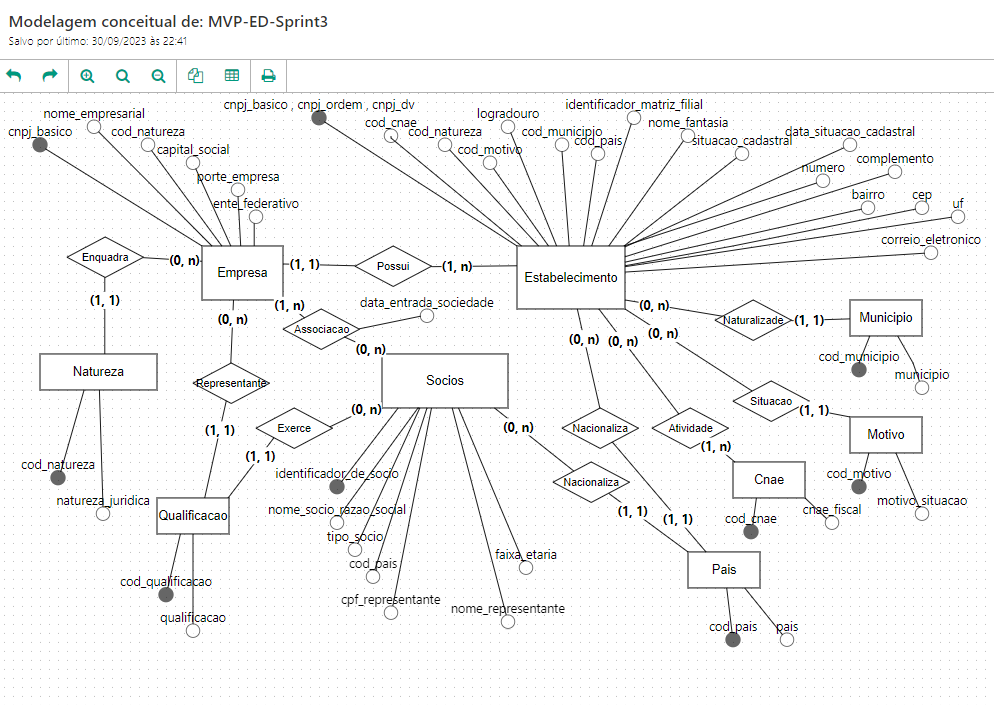

---
EMPRESAS

| campo | Descrição do Campo | Domínio|
|---|---|---|
|**cnpj_basico**|*Número de Inscrição Base no Cadastro de Pessoas Jurídicas*|
|**nome_empresarial**|*Razão Social / Nome Empresarial da Pessoa Jurídica*|
|**cod_natureza**|*Código da Natureza Jurídica do CNPJ*|
|**cod_qualificacao_responsavel**|*Codigo da qualificação da pessoa física responsável pela empresa*|
|**capital_social**|*Valor do Capital Social da Empresa*|
|**porte_empresa**|*Código do Porte da Empresa*| **00**-Não Informado, **01**-Micro Empresa, **03**-Pequeno Porte, **05**-Demais|
|**ente_federativo_responsavel**|Código do Ente Federativo responsável|




---
ESTABELECIMENTOS

| campo | Descrição do Campo | Comentário/Domínio|
|---|---|---|
|**cnpj_basico**|*Número de Inscrição Base no Cadastro de Pessoas Jurídicas*|*Oito primeiros digitos do Cnpj*|
|**cnpj_ordem**|*Sequência do número de inscrição do estabelecimento do  Cnpj*|*Do Nono até o décimo segundo dígito do cnpj*|
|**cnpj_dv**|*Dígito verificador do número de inscrição no cnpj*|*Dois últimos dígitos do CNPJ* |
|**id_matriz_filial**|*Código do identificador matriz/filial*| **1**-Matriz **2**-Filial|
|**nome_fantasia**|*Corresponde ao nome fantasia do estabelecimento*|
|**situacao_cadastral**|*Código da situação cadastral do estabelecimento*|**1**-Nula , **2**-Ativa , **3**-Suspensa , **4**-inapta , **8**-Baixada|
|**data_situacao_cadastral**|*Data do evento da situação cadastral*|Formato: YYYYMMDD|
|**motivo_situacao_cadastral**|*Código do motivo da situação cadastral*|
|**nome_cidade_exterior**|*Nome da cidade no exterior*
|**pais**|*Código do pais*|
|**data_inicio_atividade**|*Data de início da atividade do estabelecimento*|Formato: YYYYMMDD|
|**cnae_fiscal_principal**|*Código da atividade econômica principal do estabelecimento*|
|**cnae_fiscal_secundaria**|*Código da(s) atividade(s) econômica(s) secundária(s) do estabelecimento*|
|**tipo_logradouro**|*Descrição do tipo de logradouro*|
|**logradouro**|*Nome do logradouro onde se localiza o estabelecimento*|
|**numero**|*Número onde se localiza o estabelecimento*|Quando não houver preenchimento do número haverá "s/n"|
|**complemento**|*Complemento para o endereço de localização do  estabelecimento*|
|**bairro**|*Bairro onde se localiza o estabelecimento*|
|**cep**|*Código de endereçamento postal referente ao Logradouro no qual o estabelecimento esta localizado*|
|**uf**|*Sigla da unidade da federação em que se encontra o estabelecimento*|
|**municipio**|*Código do município de jurisdição onde se encontra o Estabelecimento*|
|**ddd_1**|*DDD do primeiro telefone do estabelecimento*|
|**telefone_1**|*Número do primeiro telefone do estabelecimento*|
|**ddd_2**|*DDD do segundo telefone do estabelecimento*|
|**telefone_2**|*Número do segundo telefone do estabelecimento*|
|**ddd_fax**|*DDD do FAX do estabelecimento*|
|**fax**|*Número do FAX do estabelecimento*|
|**correio_eletronico**|*Contém o e-mail do estabelecimento*|
|**situacao_especial**|*Código da situação especial*|
|**data_situacao_especial**|*Data em que a empresa entrou em situação especial*|Formato: YYYYMMDD|


---
SOCIOS

| campo | Descrição do Campo | Comentário/Domínio|
|---|---|---|
|**cnpj_basico**|*Número de Inscrição Base no Cadastro de Pessoas Jurídicas*|
|**identificador_de_socio**|*Identificador de sócio código do identificador de sócio*|**1**–Pessoa jurídica ; **2** – Pessoa física ; **3** – estrangeiro|
|**nome_socio_razao_social**|*Nome do sócio no caso de Pessoa Física ou razão social no Caso de PJ*|
|**tipo_socio**|*tipo de pessoa  identificadora de sócio*|*1*-CPF ou *2*-CNPJ*|
|**qualificacao_socio**|*Código da qualificação do sócio*|
|**data_entrada_sociedade**|*Data de entrada na sociedade*|
|**cod_pais**|*Código país do sócio estrangeiro*|
|**cpf_representante_legal**|*Número do cpf do representante legal*|
|**nome_representante**|*Nome do representante nome do representante legal*|
|**qualificacao_representante**|*Qualificação do Representante legal|
|**faixa_etaria**|*Faixa etária código correspondente à faixa etária do sócio*|**1** -para os intervalos entre 0 a 12 anos|
|||**2** -para os intervalos entre 13 a 20 anos|
|||**3** -para os intervalos entre 21 a 30 anos|
|||**4** -para os intervalos entre 31 a 40 anos|
|||**5** -para os intervalos entre 41 a 50 anos|
|||**6** -para os intervalos entre 51 a 60 anos|
|||**7** -para os intervalos entre 61 a 70 anos|
|||**8** -para os intervalos entre 71 a 80 anos|
|||**9** -para maiores de 80 anos|
|||**0** -para não se aplica|


|Obs|
|---|
| O campo **cnpj_ou_cpf_do_socio** e **representante_legal** do layout de sócios devem ser descaracterizados conforme a regra abaixo: |
|Ocultação de informações pessoais sigilosas como no caso do CPF, o qual deve ser descaracterizado por meio da ocultação dos três|
|primeiros dígitos e dos dois dígitos verificadores, conforme orientação disposta no art. 129 § 2o da Lei no 13.473/2017 (LDO 2018).|

---
**TABELAS DE DOMINIO**


---


Tabela de Naturezas Jurídicas

| campo | Descrição do Campo |
|---|---|
|**id_natureza**|*Código da Natureza Jurídica*|
**descricao_natureza**|*Descrição da  Natureza Jurídica*|


---


Tabela de Cnaes

| campo | Descrição do Campo |
|---|---|
|**id_cnae**|*Código da Atividade Econômica do Estabelecimento*|
**descricao_cnae**|*Descrição da Atividade Econômica do Estabelecimento*|

---


Tabela de Países

| campo | Descrição do Campo |
|---|---|
|**id_pais**|*Código do País do Estabelecimento*|
**descriçao_pais**|*Nome do País*|

---


Tabela de Qualificação

| campo | Descrição do Campo |
|---|---|
|**id_qualificacao**|*Código da qualificação do sócio , representante legal ou responsável pela empresa*|
**descriçao_qualificacao**|*Descrição da qualificação*|


---


Tabela de Motivo de Situação Cadastral

| campo | Descrição do Campo |
|---|---|
|**id_motivo**|*Código do motivo da situação cadastral*|
**descriçao_motivo_situacao**|*Descrição da qualificação*|

---


Tabela de Motivo de Municípios

| campo | Descrição do Campo |
|---|---|
|**id_municipio**|*Código do município do estabelecimento*|
**descriçao_municipio**|*Descrição da monicípio*|



Como as informações irão subir para o modelo o datalake , somente foi apresentado o modelo conceitual , tendo base nas informações contidas no site do gov.br .  O físico será através de carga dos arquivos parquet


# Carga

In [1]:
# instalar as dependências
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark


In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [4]:

import findspark
findspark.init()


## [SparkSession](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.SparkSession.html)

O ponto de entrada para programar o Spark com a API Dataset e DataFrame.

Uma SparkSession pode ser utilizada para criar DataFrames, registrar DataFrames como tabelas, executar consultas SQL em tabelas, armazenar em cache e ler arquivos parquet.

In [5]:
# from pyspark.sql import SparkSession

# spark = SparkSession.builder \
#     .master('local[*]') \
#     .appName("Iniciando com Spark") \
#     .getOrCreate()

In [6]:
# spark

## Acessando o [Spark UI](https://spark.apache.org/docs/3.1.2/web-ui.html) (Google Colab)

In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("MVP - ED") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

In [9]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [50]:
get_ipython().system_raw('./ngrok http 4050 &')

In [10]:
!curl -s http://localhost:4040/api/tunnels

{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://ab0a-34-83-20-70.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}},{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://ab0a-34-83-20-70.ngrok.io","proto":"http","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


In [12]:
spark

### Montando  drive

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import os # Biblioteca para manipular arquivos

# ============================
def verificaDiretorio():
    """
      Verifica se existe o diretório.
    """

    # Verifica se o diretório existe
    if not os.path.exists(DIRETORIO):
        # Cria o diretório
        os.makedirs(DIRETORIO)
        logging.info("Diretório criado: {}".format(DIRETORIO))

    return DIRETORIO

In [15]:
# Import das bibliotecas.
import logging # Biblioteca de logging

# Formatando a mensagem de logging
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s")

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [16]:
# Import das bibliotecas.
import sys # Biblioteca para acessar módulos do sistema

# Se estiver executando no Google Colaboratory
# Retorna true ou false se estiver no Google Colaboratory
IN_COLAB = "google.colab" in sys.modules

In [17]:
# Diretório
DIRETORIO = "dados_mvp"

# Diretório local para os arquivos pré-processados
DIRETORIO_LOCAL = "/content/" + DIRETORIO + "/"

# Diretório no google drive com os arquivos pré-processados
DIRETORIO_DRIVE = "/content/drive/MyDrive/MVP/" + DIRETORIO + "/"

In [18]:
import zipfile

### Carga Tabelas de Domínio  

**Tabela Situação Cadastral**

In [19]:
zipfile.ZipFile('/content/drive/MyDrive/MVP/Motivos.zip', 'r').extractall('/content/drive/MyDrive/MVP')
path = '/content/drive/MyDrive/MVP/Motivos.csv'
motivos = spark.read.csv(path, sep=';', inferSchema=True)
motivos.count()

61

In [20]:
# renomeando colunas do Dataframe
motivosColNames = ['cod_motivo', 'motivo']
for index, colName in enumerate(motivosColNames):
    motivos = motivos.withColumnRenamed(f"_c{index}", colName)


In [21]:
motivos.limit(3).toPandas()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,cod_motivo,motivo
0,0,SEM MOTIVO
1,1,EXTINCAO POR ENCERRAMENTO LIQUIDACAO VOLUNTARIA
2,2,INCORPORACAO


**Tabela Natureza Jurídica**

In [22]:
zipfile.ZipFile('/content/drive/MyDrive/MVP/Naturezas2.zip', 'r').extractall('/content/drive/MyDrive/MVP')
path = '/content/drive/MyDrive/MVP/Naturezas2.csv'
naturezas = spark.read.csv(path, sep=';', inferSchema=True)
naturezas.count()

90

In [23]:
# renomeando colunas do Dataframe
naturezasColNames = ['cod_natureza', 'natureza']
for index, colName in enumerate(naturezasColNames):
    naturezas = naturezas.withColumnRenamed(f"_c{index}", colName)

In [24]:
naturezas.limit(3).toPandas()

,cod_natureza,natureza
0,0,Natureza Jurídica não informada
1,3271,Órgão de Direção Local de Partido Político
2,3280,Comitê Financeiro de Partido Político


**Tabela CNAES - Atividades Economicas**

In [25]:
zipfile.ZipFile('/content/drive/MyDrive/MVP/Cnaes.zip', 'r').extractall('/content/drive/MyDrive/MVP')
path = '/content/drive/MyDrive/MVP/Cnaes.csv'
cnaes = spark.read.csv(path, sep=';', inferSchema=True)
cnaes.count()

1359

In [26]:
# renomeando colunas do Dataframe
cnaesColNames = ['cod_cnae', 'atividade_economica']
for index, colName in enumerate(cnaesColNames):
    cnaes = cnaes.withColumnRenamed(f"_c{index}", colName)

In [27]:
cnaes.limit(3).toPandas()

,cod_cnae,atividade_economica
0,111301,Cultivo de arroz
1,111302,Cultivo de milho
2,111303,Cultivo de trigo


**Tabela Países**

In [28]:
zipfile.ZipFile('/content/drive/MyDrive/MVP/Paises.zip', 'r').extractall('/content/drive/MyDrive/MVP')
path = '/content/drive/MyDrive/MVP/Paises.csv'
paises = spark.read.csv(path, sep=';', inferSchema=True)
paises.count()

255

In [29]:
# renomeando colunas do Dataframe
paisesColNames = ['cod_pais', 'pais']
for index, colName in enumerate(paisesColNames):
    paises = paises.withColumnRenamed(f"_c{index}", colName)

In [30]:
paises.limit(3).toPandas()

,cod_pais,pais
0,0,COLIS POSTAUX
1,13,AFEGANISTAO
2,17,ALBANIA


**Tabela Qualificações**

In [31]:
zipfile.ZipFile('/content/drive/MyDrive/MVP/Qualificacoes2.zip', 'r').extractall('/content/drive/MyDrive/MVP')
path = '/content/drive/MyDrive/MVP/Qualificacoes2.csv'
qualificacoes = spark.read.csv(path, sep=';', inferSchema=True)
qualificacoes.count()

68

In [35]:
# renomeando colunas do Dataframe
qualifColNames = ['cod_qualificacao', 'qualificacao']
for index, colName in enumerate(qualifColNames):
    qualificacoes = qualificacoes.withColumnRenamed(f"_c{index}", colName)

In [ ]:
qualificacoes.limit(3).toPandas()

**Tabela Municipios**

In [89]:
zipfile.ZipFile('/content/drive/MyDrive/MVP/Municipios.zip', 'r').extractall('/content/drive/MyDrive/MVP')
path = '/content/drive/MyDrive/MVP/Municipios.csv'
municipios = spark.read.csv(path, sep=';', inferSchema=True)
municipios.count()

5571

In [90]:
# renomeando colunas do Dataframe
municColNames = ['cod_municipio', 'nome_municipio']
for index, colName in enumerate(municColNames):
    municipios = municipios.withColumnRenamed(f"_c{index}", colName)

In [91]:
municipios.limit(3).toPandas()

,cod_municipio,nome_municipio
0,1,GUAJARA-MIRIM
1,2,ALTO ALEGRE DOS PARECIS
2,3,PORTO VELHO


### **Carregando os dados das empresas**

In [36]:
zipfile.ZipFile('/content/drive/MyDrive/MVP/empresas0.zip', 'r').extractall('/content/drive/MyDrive/MVP')
path = '/content/drive/MyDrive/MVP/empresas0.csv'
empresas = spark.read.csv(path, sep=';', inferSchema=True)
empresas.count()

14528540

In [37]:
# renomeando colunas do Dataframe
empresasColNames = ['cnpj_basico', 'nome_empresarial', 'natureza_juridica', 'qualificacao_responsavel', 'capital_social_empresa', 'porte_empresa', 'ente_federativo_responsavel']


In [38]:
for index, colName in enumerate(empresasColNames):
    empresas = empresas.withColumnRenamed(f"_c{index}", colName)

empresas.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_responsavel: integer (nullable = true)
 |-- capital_social_empresa: string (nullable = true)
 |-- porte_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



In [39]:
empresas.limit(3).toPandas()

,cnpj_basico,nome_empresarial,natureza_juridica,qualificacao_responsavel,capital_social_empresa,porte_empresa,ente_federativo_responsavel
0,41273594,OZINETE DELFINO CALDAS 41608224287,2135,50,"5000,00",1,None
1,41273595,GILVAN PEREIRA XAVIER 01363090380,2135,50,"3000,00",1,None
2,41273596,RODRIGO JOSE FERREIRA LOPES 05010247941,2135,50,"10000,00",1,None


In [40]:
empresas.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_responsavel: integer (nullable = true)
 |-- capital_social_empresa: string (nullable = true)
 |-- porte_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



### **Carregando os dados dos estabelecimentos**

In [41]:
zipfile.ZipFile('/content/drive/MyDrive/MVP/estabelecimento.zip', 'r').extractall('/content/drive/MyDrive/MVP')
path = '/content/drive/MyDrive/MVP/estabelecimento.csv'
estabelecimentos = spark.read.csv(path, sep=';', inferSchema=True)
estabelecimentos.count()

8000000

In [42]:
# renomeando colunas do Dataframe
estabsColNames = ['cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'identificador_matriz_filial', 'nome_fantasia', 'situacao_cadastral', 'data_situacao_cadastral', 'motivo_situacao_cadastral', 'nome_cidade_exterior', 'pais', 'data_inicio_atividade', 'cnae_fiscal_principal', 'cnae_fiscal_secundaria', 'tipo_logradouro', 'logradouro', 'numero', 'complemento', 'bairro', 'cep', 'uf', 'municipio', 'ddd_1', 'telefone_1', 'ddd_2', 'telefone_2', 'ddd_fax', 'fax', 'correio_eletronico', 'situacao_especial', 'data_situacao_especial']

In [43]:
for index, colName in enumerate(estabsColNames):
    estabelecimentos = estabelecimentos.withColumnRenamed(f"_c{index}", colName)

estabelecimentos.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- cnpj_ordem: integer (nullable = true)
 |-- cnpj_dv: integer (nullable = true)
 |-- identificador_matriz_filial: integer (nullable = true)
 |-- nome_fantasia: string (nullable = true)
 |-- situacao_cadastral: string (nullable = true)
 |-- data_situacao_cadastral: integer (nullable = true)
 |-- motivo_situacao_cadastral: integer (nullable = true)
 |-- nome_cidade_exterior: string (nullable = true)
 |-- pais: integer (nullable = true)
 |-- data_inicio_atividade: integer (nullable = true)
 |-- cnae_fiscal_principal: string (nullable = true)
 |-- cnae_fiscal_secundaria: string (nullable = true)
 |-- tipo_logradouro: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cep: string (nullable = true)
 |-- uf: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- ddd_1: string (nullable = 

### **Carregando os dados dos sócios**

In [44]:
zipfile.ZipFile('/content/drive/MyDrive/MVP/socios0.zip', 'r').extractall('/content/drive/MyDrive/MVP')

In [45]:
path = '/content/drive/MyDrive/MVP/socios0.csv'
socios = spark.read.csv(path, sep=';', inferSchema=True)
socios.count()

19180778

In [46]:
sociosColNames = ['cnpj_basico', 'identificador_socio', 'nome_socio_razao_social', 'cnpj_ou_cpf_socio', 'qualificacao_socio', 'data_entrada_sociedade', 'pais', 'representante_legal', 'nome_representante', 'qualificacao_representante_legal', 'faixa_etaria']

In [47]:
for index, colName in enumerate(sociosColNames):
    socios = socios.withColumnRenamed(f"_c{index}", colName)

socios.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- identificador_socio: integer (nullable = true)
 |-- nome_socio_razao_social: string (nullable = true)
 |-- cnpj_ou_cpf_socio: string (nullable = true)
 |-- qualificacao_socio: integer (nullable = true)
 |-- data_entrada_sociedade: integer (nullable = true)
 |-- pais: integer (nullable = true)
 |-- representante_legal: string (nullable = true)
 |-- nome_representante: string (nullable = true)
 |-- qualificacao_representante_legal: integer (nullable = true)
 |-- faixa_etaria: integer (nullable = true)



# Manipulando os Dados
---

## Modificando os tipos de dados


### Convertendo String ➔ Double

#### `StringType ➔ DoubleType`

**Substituir o valor  com virgula ( , )   para valor com ponto (.) no campo capital_social_empresa**


In [48]:
from pyspark.sql.types import DoubleType, StringType
from pyspark.sql import functions as f

In [49]:
empresas.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_responsavel: integer (nullable = true)
 |-- capital_social_empresa: string (nullable = true)
 |-- porte_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



In [50]:
empresas.limit(1).toPandas()

,cnpj_basico,nome_empresarial,natureza_juridica,qualificacao_responsavel,capital_social_empresa,porte_empresa,ente_federativo_responsavel
0,41273594,OZINETE DELFINO CALDAS 41608224287,2135,50,"5000,00",1,None


In [51]:
empresas = empresas.withColumn('capital_social_empresa', f.regexp_replace('capital_social_empresa', ',', '.'))
empresas.limit(1).toPandas()

,cnpj_basico,nome_empresarial,natureza_juridica,qualificacao_responsavel,capital_social_empresa,porte_empresa,ente_federativo_responsavel
0,41273594,OZINETE DELFINO CALDAS 41608224287,2135,50,5000.00,1,None


In [52]:
empresas.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_responsavel: integer (nullable = true)
 |-- capital_social_empresa: string (nullable = true)
 |-- porte_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



**Convertendo para double**

In [53]:
empresas = empresas.withColumn('capital_social_empresa', empresas['capital_social_empresa'].cast(DoubleType()))
empresas.limit(1).toPandas()

,cnpj_basico,nome_empresarial,natureza_juridica,qualificacao_responsavel,capital_social_empresa,porte_empresa,ente_federativo_responsavel
0,41273594,OZINETE DELFINO CALDAS 41608224287,2135,50,5000.0,1,None


In [54]:
empresas.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_responsavel: integer (nullable = true)
 |-- capital_social_empresa: double (nullable = true)
 |-- porte_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



### Convertendo String ➔ Date

#### `StringType ➔ DateType`



In [55]:
estabelecimentos.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- cnpj_ordem: integer (nullable = true)
 |-- cnpj_dv: integer (nullable = true)
 |-- identificador_matriz_filial: integer (nullable = true)
 |-- nome_fantasia: string (nullable = true)
 |-- situacao_cadastral: string (nullable = true)
 |-- data_situacao_cadastral: integer (nullable = true)
 |-- motivo_situacao_cadastral: integer (nullable = true)
 |-- nome_cidade_exterior: string (nullable = true)
 |-- pais: integer (nullable = true)
 |-- data_inicio_atividade: integer (nullable = true)
 |-- cnae_fiscal_principal: string (nullable = true)
 |-- cnae_fiscal_secundaria: string (nullable = true)
 |-- tipo_logradouro: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cep: string (nullable = true)
 |-- uf: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- ddd_1: string (nullable = 

In [56]:
estabelecimentos = estabelecimentos\
    .withColumn(
        "data_situacao_cadastral",
        f.to_date(estabelecimentos.data_situacao_cadastral.cast(StringType()), 'yyyyMMdd')
    )\
    .withColumn(
        "data_de_inicio_atividade",
        f.to_date(estabelecimentos.data_inicio_atividade.cast(StringType()), 'yyyyMMdd')
    )\
    .withColumn(
        "data_da_situacao_especial",
        f.to_date(estabelecimentos.data_situacao_especial.cast(StringType()), 'yyyyMMdd')
    )

estabelecimentos.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- cnpj_ordem: integer (nullable = true)
 |-- cnpj_dv: integer (nullable = true)
 |-- identificador_matriz_filial: integer (nullable = true)
 |-- nome_fantasia: string (nullable = true)
 |-- situacao_cadastral: string (nullable = true)
 |-- data_situacao_cadastral: date (nullable = true)
 |-- motivo_situacao_cadastral: integer (nullable = true)
 |-- nome_cidade_exterior: string (nullable = true)
 |-- pais: integer (nullable = true)
 |-- data_inicio_atividade: integer (nullable = true)
 |-- cnae_fiscal_principal: string (nullable = true)
 |-- cnae_fiscal_secundaria: string (nullable = true)
 |-- tipo_logradouro: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cep: string (nullable = true)
 |-- uf: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- ddd_1: string (nullable = tru

In [57]:
estabelecimentos.limit(1).toPandas()

,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nome_cidade_exterior,pais,...,telefone_1,ddd_2,telefone_2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,data_de_inicio_atividade,data_da_situacao_especial
0,20456681,1,4,1,MARCELO CONSTRUTOR,08,2018-02-01,67,None,NaN,...,99470550,None,None,NaN,None,marceloguilhermino88@hotmail.com,None,None,2014-06-16,None


In [58]:
socios.limit(1).toPandas()

,cnpj_basico,identificador_socio,nome_socio_razao_social,cnpj_ou_cpf_socio,qualificacao_socio,data_entrada_sociedade,pais,representante_legal,nome_representante,qualificacao_representante_legal,faixa_etaria
0,36505460,2,WASHINGTON CARLOS ALVES COSTA,***299098**,49,20200228,NaN,***000000**,None,0,6


In [59]:
socios.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- identificador_socio: integer (nullable = true)
 |-- nome_socio_razao_social: string (nullable = true)
 |-- cnpj_ou_cpf_socio: string (nullable = true)
 |-- qualificacao_socio: integer (nullable = true)
 |-- data_entrada_sociedade: integer (nullable = true)
 |-- pais: integer (nullable = true)
 |-- representante_legal: string (nullable = true)
 |-- nome_representante: string (nullable = true)
 |-- qualificacao_representante_legal: integer (nullable = true)
 |-- faixa_etaria: integer (nullable = true)



In [60]:
socios = socios\
    .withColumn(
        "data_entrada_sociedade",
        f.to_date(socios.data_entrada_sociedade.cast(StringType()), 'yyyyMMdd')
    )

socios.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- identificador_socio: integer (nullable = true)
 |-- nome_socio_razao_social: string (nullable = true)
 |-- cnpj_ou_cpf_socio: string (nullable = true)
 |-- qualificacao_socio: integer (nullable = true)
 |-- data_entrada_sociedade: date (nullable = true)
 |-- pais: integer (nullable = true)
 |-- representante_legal: string (nullable = true)
 |-- nome_representante: string (nullable = true)
 |-- qualificacao_representante_legal: integer (nullable = true)
 |-- faixa_etaria: integer (nullable = true)



In [61]:
socios.limit(5).toPandas()

,cnpj_basico,identificador_socio,nome_socio_razao_social,cnpj_ou_cpf_socio,qualificacao_socio,data_entrada_sociedade,pais,representante_legal,nome_representante,qualificacao_representante_legal,faixa_etaria
0,36505460,2,WASHINGTON CARLOS ALVES COSTA,***299098**,49,2020-02-28,NaN,***000000**,None,0,6
1,36505518,2,PAULO RENNAN CORDEIRO DE OLIVEIRA,***338003**,22,2020-02-28,NaN,***000000**,None,0,4
2,36505518,2,FRANCISCO DE ASSIS CORDEIRO DE OLIVEIRA JUNIOR,***150703**,49,2020-02-28,NaN,***000000**,None,0,3
3,36505564,2,ISABELA DOS SANTOS FARIA,***121837**,49,2020-02-28,NaN,***000000**,None,0,4
4,36505564,2,MONROE HELIO BRODA DOS SANTOS,***073287**,49,2020-02-28,NaN,***000000**,None,0,4


# Seleções e consultas
---

## Selecionando informações

[DataFrame.select(*cols)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.select.html)

In [62]:
empresas\
    .select('*')\
    .show(5, False)

+-----------+----------------------------------------------+-----------------+------------------------+----------------------+-------------+---------------------------+
|cnpj_basico|nome_empresarial                              |natureza_juridica|qualificacao_responsavel|capital_social_empresa|porte_empresa|ente_federativo_responsavel|
+-----------+----------------------------------------------+-----------------+------------------------+----------------------+-------------+---------------------------+
|41273594   |OZINETE DELFINO CALDAS 41608224287            |2135             |50                      |5000.0                |1            |null                       |
|41273595   |GILVAN PEREIRA XAVIER 01363090380             |2135             |50                      |3000.0                |1            |null                       |
|41273596   |RODRIGO JOSE FERREIRA LOPES 05010247941       |2135             |50                      |10000.0               |1            |null           

In [63]:
empresas\
    .select('natureza_juridica', 'porte_empresa', 'capital_social_empresa')\
    .show(5)

+-----------------+-------------+----------------------+
|natureza_juridica|porte_empresa|capital_social_empresa|
+-----------------+-------------+----------------------+
|             2135|            1|                5000.0|
|             2135|            1|                3000.0|
|             2135|            1|               10000.0|
|             2135|            1|                5000.0|
|             2135|            1|                1100.0|
+-----------------+-------------+----------------------+
only showing top 5 rows



In [64]:
socios\
    .select('nome_socio_razao_social', 'faixa_etaria', f.year('data_entrada_sociedade').alias('ano_de_entrada'))\
    .show(5, False)

+----------------------------------------------+------------+--------------+
|nome_socio_razao_social                       |faixa_etaria|ano_de_entrada|
+----------------------------------------------+------------+--------------+
|WASHINGTON CARLOS ALVES COSTA                 |6           |2020          |
|PAULO RENNAN CORDEIRO DE OLIVEIRA             |4           |2020          |
|FRANCISCO DE ASSIS CORDEIRO DE OLIVEIRA JUNIOR|3           |2020          |
|ISABELA DOS SANTOS FARIA                      |4           |2020          |
|MONROE HELIO BRODA DOS SANTOS                 |4           |2020          |
+----------------------------------------------+------------+--------------+
only showing top 5 rows



In [65]:
estabelecimentos\
    .select('nome_fantasia', 'municipio', f.year('data_de_inicio_atividade').alias('ano_de_inicio_atividade'), f.month('data_de_inicio_atividade').alias('mes_de_inicio_atividade'))\
    .show(5, False)

+---------------------------+---------+-----------------------+-----------------------+
|nome_fantasia              |municipio|ano_de_inicio_atividade|mes_de_inicio_atividade|
+---------------------------+---------+-----------------------+-----------------------+
|MARCELO CONSTRUTOR         |9883     |2014                   |6                      |
|CLL ASSESSORIA FARMACEUTICA|7075     |2011                   |6                      |
|TRANSPORTES IGLEZIAS       |2951     |2011                   |7                      |
|null                       |7583     |2011                   |7                      |
|null                       |7069     |2011                   |7                      |
+---------------------------+---------+-----------------------+-----------------------+
only showing top 5 rows



## Identificando valores nulos

In [66]:
empresas.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in empresas.columns]).show()

+-----------+----------------+-----------------+------------------------+----------------------+-------------+---------------------------+
|cnpj_basico|nome_empresarial|natureza_juridica|qualificacao_responsavel|capital_social_empresa|porte_empresa|ente_federativo_responsavel|
+-----------+----------------+-----------------+------------------------+----------------------+-------------+---------------------------+
|          0|               1|                0|                       0|                     0|        10859|                   14518828|
+-----------+----------------+-----------------+------------------------+----------------------+-------------+---------------------------+



In [ ]:
socios.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in socios.columns]).show()

In [67]:
socios.na.fill(0).limit(5).toPandas()

,cnpj_basico,identificador_socio,nome_socio_razao_social,cnpj_ou_cpf_socio,qualificacao_socio,data_entrada_sociedade,pais,representante_legal,nome_representante,qualificacao_representante_legal,faixa_etaria
0,36505460,2,WASHINGTON CARLOS ALVES COSTA,***299098**,49,2020-02-28,0,***000000**,None,0,6
1,36505518,2,PAULO RENNAN CORDEIRO DE OLIVEIRA,***338003**,22,2020-02-28,0,***000000**,None,0,4
2,36505518,2,FRANCISCO DE ASSIS CORDEIRO DE OLIVEIRA JUNIOR,***150703**,49,2020-02-28,0,***000000**,None,0,3
3,36505564,2,ISABELA DOS SANTOS FARIA,***121837**,49,2020-02-28,0,***000000**,None,0,4
4,36505564,2,MONROE HELIO BRODA DOS SANTOS,***073287**,49,2020-02-28,0,***000000**,None,0,4


In [68]:
socios.na.fill('-').limit(5).toPandas()

,cnpj_basico,identificador_socio,nome_socio_razao_social,cnpj_ou_cpf_socio,qualificacao_socio,data_entrada_sociedade,pais,representante_legal,nome_representante,qualificacao_representante_legal,faixa_etaria
0,36505460,2,WASHINGTON CARLOS ALVES COSTA,***299098**,49,2020-02-28,NaN,***000000**,-,0,6
1,36505518,2,PAULO RENNAN CORDEIRO DE OLIVEIRA,***338003**,22,2020-02-28,NaN,***000000**,-,0,4
2,36505518,2,FRANCISCO DE ASSIS CORDEIRO DE OLIVEIRA JUNIOR,***150703**,49,2020-02-28,NaN,***000000**,-,0,3
3,36505564,2,ISABELA DOS SANTOS FARIA,***121837**,49,2020-02-28,NaN,***000000**,-,0,4
4,36505564,2,MONROE HELIO BRODA DOS SANTOS,***073287**,49,2020-02-28,NaN,***000000**,-,0,4


## SparkSQL



In [69]:
empresas.createOrReplaceTempView("empresasView")

In [70]:
spark.sql("SELECT * FROM empresasView").show(5)

+-----------+--------------------+-----------------+------------------------+----------------------+-------------+---------------------------+
|cnpj_basico|    nome_empresarial|natureza_juridica|qualificacao_responsavel|capital_social_empresa|porte_empresa|ente_federativo_responsavel|
+-----------+--------------------+-----------------+------------------------+----------------------+-------------+---------------------------+
|   41273594|OZINETE DELFINO C...|             2135|                      50|                5000.0|            1|                       null|
|   41273595|GILVAN PEREIRA XA...|             2135|                      50|                3000.0|            1|                       null|
|   41273596|RODRIGO JOSE FERR...|             2135|                      50|               10000.0|            1|                       null|
|   41273597|PACHARRUS QUEIROZ...|             2135|                      50|                5000.0|            1|                       null|

In [71]:
spark\
    .sql("""
        SELECT *
            FROM empresasView
            WHERE capital_social_empresa = 50
    """)\
    .show(5)

+-----------+--------------------+-----------------+------------------------+----------------------+-------------+---------------------------+
|cnpj_basico|    nome_empresarial|natureza_juridica|qualificacao_responsavel|capital_social_empresa|porte_empresa|ente_federativo_responsavel|
+-----------+--------------------+-----------------+------------------------+----------------------+-------------+---------------------------+
|   41273672|ELDILEY FRANCISCO...|             2135|                      50|                  50.0|            1|                       null|
|   41273842|RAIMUNDO RAFAEL D...|             2135|                      50|                  50.0|            1|                       null|
|   41273857|41.273.857 IDIVAN...|             2135|                      50|                  50.0|            1|                       null|
|   41274714|41.274.714 BRUNA ...|             2135|                      50|                  50.0|            1|                       null|

In [72]:
spark\
    .sql("""
        SELECT porte_empresa, MEAN(capital_social_empresa) AS Media
            FROM empresasView
            GROUP BY porte_empresa
    """)\
    .show(5)

+-------------+--------------------+
|porte_empresa|               Media|
+-------------+--------------------+
|         null|  1.1971636430610553|
|            1|  1148052.3025991726|
|            3|1.5653759025001535E8|
|            5| 2.108802168025892E7|
+-------------+--------------------+



## Solução do Problema

### **Lougradouros e Bairros com a maior quantidade de estabelecimentos de padarias e confeitarias no estado do Rio de Janeiro**

In [92]:
municipios.printSchema()

root
 |-- cod_municipio: integer (nullable = true)
 |-- nome_municipio: string (nullable = true)



In [74]:
cnaes.printSchema()

root
 |-- cod_cnae: integer (nullable = true)
 |-- atividade_economica: string (nullable = true)



In [75]:
estabelecimentos.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- cnpj_ordem: integer (nullable = true)
 |-- cnpj_dv: integer (nullable = true)
 |-- identificador_matriz_filial: integer (nullable = true)
 |-- nome_fantasia: string (nullable = true)
 |-- situacao_cadastral: string (nullable = true)
 |-- data_situacao_cadastral: date (nullable = true)
 |-- motivo_situacao_cadastral: integer (nullable = true)
 |-- nome_cidade_exterior: string (nullable = true)
 |-- pais: integer (nullable = true)
 |-- data_inicio_atividade: integer (nullable = true)
 |-- cnae_fiscal_principal: string (nullable = true)
 |-- cnae_fiscal_secundaria: string (nullable = true)
 |-- tipo_logradouro: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cep: string (nullable = true)
 |-- uf: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- ddd_1: string (nullable = tru

In [76]:
cnaes.createOrReplaceTempView("cnaesView")

In [94]:
municipios.createOrReplaceTempView("municipiosView")

In [77]:
estabelecimentos.createOrReplaceTempView("estabelecimentosView")

**Query da Solução**

In [124]:
spark\
    .sql("""
        SELECT tipo_logradouro, logradouro, bairro , atividade_economica , count(*)
            FROM estabelecimentosView a ,
                 municipiosView b ,
                 cnaesView c
            WHERE   uf = 'RJ'
            AND int(municipio) = b.cod_municipio
            AND int(cnae_fiscal_principal) = c.cod_cnae
            AND atividade_economica like '%Padaria%'
            GROUP BY tipo_logradouro, logradouro, bairro , atividade_economica
            ORDER BY atividade_economica , count(*) DESC

     """)\
    .show(50)

+---------------+--------------------+-------------------+--------------------+--------+
|tipo_logradouro|          logradouro|             bairro| atividade_economica|count(1)|
+---------------+--------------------+-------------------+--------------------+--------+
|        AVENIDA|        DAS AMERICAS|    BARRA DA TIJUCA|Padaria e confeit...|      12|
|            RUA|        DA CONCEICAO|             CENTRO|Padaria e confeit...|       9|
|            RUA|              TERESA|      ALTO DA SERRA|Padaria e confeit...|       7|
|        AVENIDA|JOSE BENTO RIBEIR...|         MANGUINHOS|Padaria e confeit...|       7|
|        ESTRADA|         DE SEPETIBA|         SANTA CRUZ|Padaria e confeit...|       6|
|        ESTRADA|           DA MATRIZ|          GUARATIBA|Padaria e confeit...|       5|
|        AVENIDA|    COMENDADOR TELES|    VILAR DOS TELES|Padaria e confeit...|       5|
|            RUA|   DOUTOR JOAO MARIA|  PARQUE JOAO MARIA|Padaria e confeit...|       5|
|        AVENIDA|    

## Geração Arquivos Parquet
---

In [ ]:
empresas.write.parquet(
    path='/content/drive/MyDrive/empresas/parquet',
    mode='overwrite'
)

In [ ]:
empresas_parquet = spark.read.parquet(
    '/content/drive/MyDrive/empresas/parquet'
)

In [ ]:
empresas_parquet.printSchema()

In [ ]:
spark.stop()

## AutoAvaliação

Tentei utilizar o as informações existentes na base da Receita  , que foram disponibilizadas no site GOV.BR  As tabelas possuem problemas de normalização , bem como problemas de conversão de data e de valor  que seriam necessários para as consultas. Existe campo chave com informação de nulo.

Fiz o modelo conceitual de acordo com o que acreditava ser o modelo ideal  .

O trabalho via Colab com o PySpark foi muito mais ágil do que a utilizazão da ferramenta do Google Cloud  Dataproc com as consultas via  Hive  , mesmo assim , as consultas pelo SparkSQL  via COLAB apresentaram  muita instabilidade . Precisei fazer um  curso de Spark  durante o trabalho, pois pensei que era o melhor caminho
